In [20]:
from IPython.display import Markdown as md
from IPython.display import display
import pandas as pd
from pathlib import Path
from datetime import datetime
from recopytex import flat_clear_csv, pp_q_scores
%matplotlib inline

In [21]:
tribe = "308"
assessment = "DM1"
date = "15/09/16"
csv_file = Path(f"../sheets/{tribe}/160915_{assessment}.csv")

In [22]:
if date is None:
    display(md(f"# {assessment} pour {tribe}"))
else:
    display(md(f"# {assessment} ({date}) pour {tribe}"))

# DM1 (15/09/16) pour 308

In [23]:
stack_scores = pd.read_csv(csv_file)
scores = flat_clear_csv(stack_scores).dropna(subset=["Score"])
scores = pp_q_scores(scores)

In [24]:
exercises_scores = scores.groupby(["Exercice", "Eleve"]).agg({"Note": "sum", "Bareme": "sum"})
exercises_scores.head()

Note  Bareme
Exercice Eleve                                 
1        ABDOU Asmahane            3.67     6.0
         ABOU Roihim               0.00     6.0
         AHMED BOINALI Kouraichia  1.33     6.0
         AHMED Rahada              2.67     6.0
         ALI SAID Anchourati       0.00     6.0

In [25]:
assessment_scores = scores.groupby(["Eleve"]).agg({"Note": "sum", "Bareme": "sum"})
assessment_scores

Note  Bareme
Eleve                                 
ABDOU Asmahane            5.00    12.0
ABOU Roihim               0.00    12.0
AHMED BOINALI Kouraichia  2.67    12.0
AHMED Rahada              6.33    12.0
ALI SAID Anchourati       0.00    12.0
ASSANE Noussouraniya      4.67    12.0
BACAR Issiaka             0.00    12.0
BACAR Samina              3.67    12.0
CHAIHANE Said             5.33    12.0
COMBO Houzaimati          5.00    12.0
DAOUD Anzilati            5.17    12.0
DAOUD Talaenti            5.67    12.0
DARKAOUI Rachma           5.67    12.0
DHAKIOINE Nabaouya        1.00    12.0
DJANFAR Soioutinour       5.33    12.0
DRISSA Ibrahim            0.00    12.0
HACHIM SIDI Assani        7.00    12.0
HAFIDHUI Zalifa           5.67    12.0
HOUMADI Marie             6.67    12.0
HOUMADI Sania             5.33    12.0
MAANDHUI Halouoi          7.00    12.0
MASSONDI Nasma            7.33    12.0
SAIDALI Irichad           5.00    12.0

In [26]:
assessment_scores["Note"].describe()

count    23.00
mean      4.33
std       2.45
min       0.00
25%       3.17
50%       5.17
75%       5.67
max       7.33
Name: Note, dtype: float64

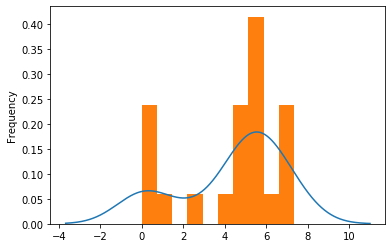

In [32]:
assessment_scores["Note"].plot.kde()
assessment_scores["Note"].plot.hist(density=True)